<a href="https://colab.research.google.com/github/AAFREEN-SAYYED/ML-Practical-Solution/blob/gh-pages/ML_12(Long)_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN Algorithm**

In [ ]:
#2. Importing and preperation of data¶
#2.1 Import libraries
import numpy as np
import pandas as pd


In [ ]:
#2.2 Load dataset

dataset = pd.read_csv('Iris.csv')


In [ ]:
#2.3 Summarize the Dataset¶
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
dataset.shape


(150, 6)

In [ ]:
dataset.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
dataset.groupby('Species').size()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

2.4 Dividing data into features and labels¶

NOTE: As we can see dataset contain six columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. Last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).







In [ ]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

2.5 Label encoding¶

NOTE: As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


**3. Data Visualization¶**

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


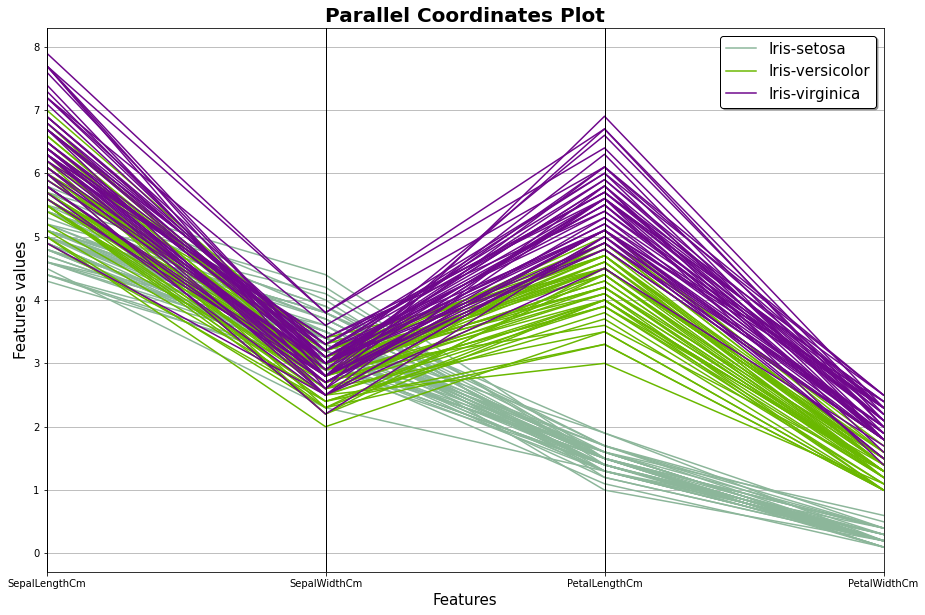

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#3.1. Parallel Coordinates
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()


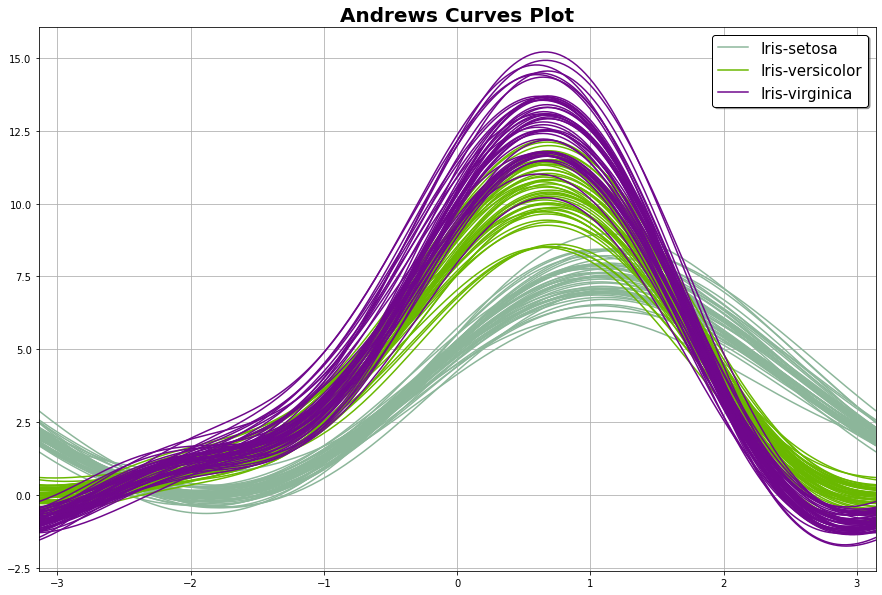

In [ ]:
#3.2. Andrews Curves
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

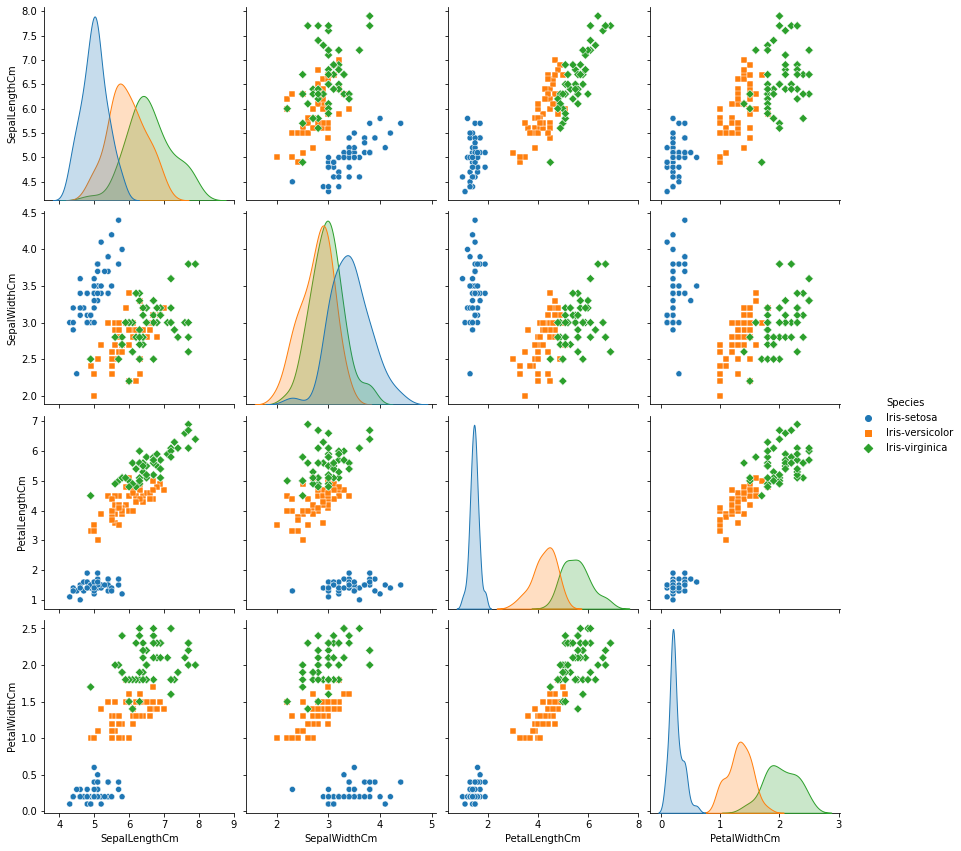

In [ ]:
#3.3. Pairplot
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

<Figure size 432x288 with 0 Axes>

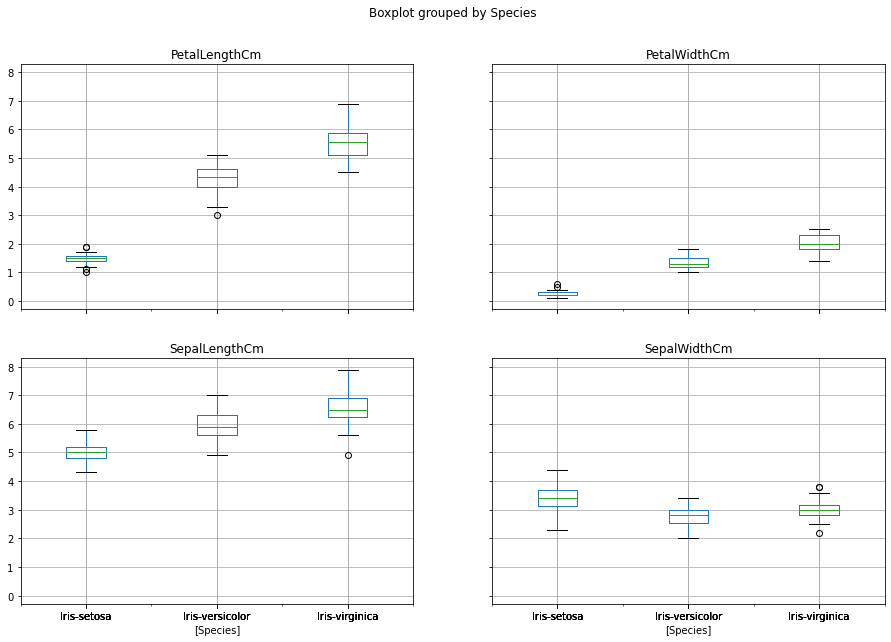

In [ ]:
#3.4. Boxplots
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()


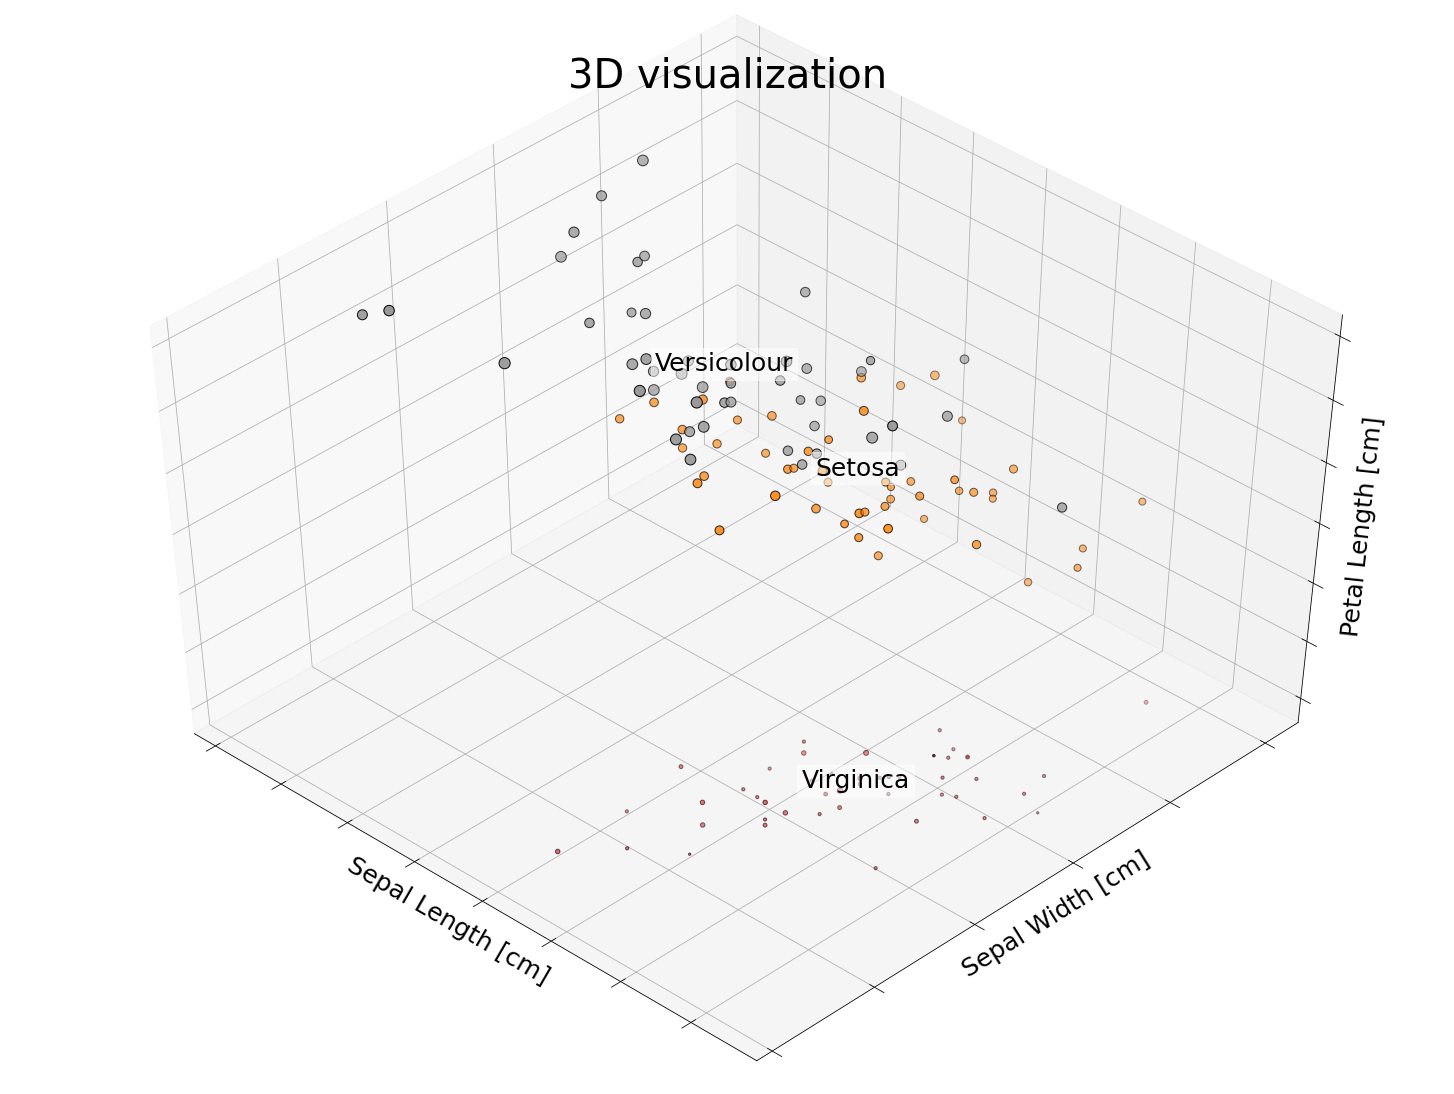

In [ ]:
#3.5. 3D visualization
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

**4. Using KNN for classification¶**

**4.1. Making predictions** 


In [ ]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [ ]:
#4.2. Evaluating predictions¶
#Building confusion matrix:

cm = confusion_matrix(y_test, y_pred)
cm


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [ ]:
#Calculating model accuracy:

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
#Accuracy of our model is equal 96.67 %.


Accuracy of our model is equal 96.67 %.
